# Capstone Project - Best Pizza in Rochester, MN

I started a new job in Rochester, MN at the beginning of this year and recently moved to the area. My wife and I love to try new restaurants and foods, but there’s one food that never seems to get old for us: Pizza. In every area I’ve ever lived, people seem to be on a search for the best pizza in town, however everyone has a different opinion. Since I’m living in a new area and haven’t tried many pizza places here yet, I thought it would be interesting to use user ratings from pizza restaurants to try and determine objectively where the coveted ‘best pizza in town’ can be found based on the subjective responses of Foursquare users.

#### Import libraries needed for analysis

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # plotting library

#### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'OZDGI3WBZFKI1NGNJC2IJA3PBGYU2F3LWAUR2HKLUOCC0QIZ' # your Foursquare ID
CLIENT_SECRET = 'KQHW1IQTHQTLW2YDM2QHINGMJJ1OZVH3TYDRRFSYMT3ALIP4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OZDGI3WBZFKI1NGNJC2IJA3PBGYU2F3LWAUR2HKLUOCC0QIZ
CLIENT_SECRET:KQHW1IQTHQTLW2YDM2QHINGMJJ1OZVH3TYDRRFSYMT3ALIP4


I'll start by grabbing the latitude and longitude coordinates of Rochester, MN using the geocoder library.

In [3]:
address = 'Rochester, MN'

geolocator = Nominatim(user_agent="rochester_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

44.0234387 -92.4630182


Now I define a query for Pizza places within the Foursquare API. I did not define a radius since according to the Foursquare documentation it defaults to a city-wide area which is exactly what I want. I also make my search query 'Pizz' rather than 'Pizza' or 'Pizzeria' because I found that doing one or the other leaves out some Pizza Places since the search query is based on the name of the venue. I figured both 'Pizza' and 'Pizzeria' begin with 'Pizz', so hopefully this is able to capture more of the relevant options.

In [4]:
search_query = 'Pizz'

print(search_query + ' .... OK!')

Pizz .... OK!


In [5]:
# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query)
url

'https://api.foursquare.com/v2/venues/search?client_id=OZDGI3WBZFKI1NGNJC2IJA3PBGYU2F3LWAUR2HKLUOCC0QIZ&client_secret=KQHW1IQTHQTLW2YDM2QHINGMJJ1OZVH3TYDRRFSYMT3ALIP4&ll=44.0234387,-92.4630182&v=20180605&query=Pizz'

In [6]:
# Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d9de456c53093002c2f56f4'},
 'response': {'venues': [{'id': '5ad912b4dec1d67320095aa0',
    'name': "Bb's Pizza Express",
    'location': {'lat': 44.022156,
     'lng': -92.46363,
     'labeledLatLngs': [{'label': 'display',
       'lat': 44.022156,
       'lng': -92.46363}],
     'distance': 150,
     'postalCode': '55904',
     'cc': 'US',
     'city': 'Rochester',
     'state': 'MN',
     'country': 'United States',
     'formattedAddress': ['Rochester, MN 55904', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '1175259',
     'url': 'https://www.grubhub.com/restaurant/bbs-express-111-s-broadway-ste-211-rochester/1175259?affiliate=1131&utm_source=foursquare-affiliate-network&utm_m

Get the relevant part of the JSON file and convert it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.address,venuePage.id
0,5ad912b4dec1d67320095aa0,Bb's Pizza Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.022156,-92.463630,"[{'label': 'display', 'lat': 44.022156, 'lng':...",150,55904,...,United States,"[Rochester, MN 55904, United States]",1175259,https://www.grubhub.com/restaurant/bbs-express...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,4d41f095aed776eb1b886997,Domino's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.018146,-92.458319,"[{'label': 'display', 'lat': 44.01814558305649...",699,55904,...,United States,"[444 3rd Ave SE, Rochester, MN 55904, United S...",NaN,NaN,NaN,NaN,NaN,NaN,444 3rd Ave SE,NaN
2,4c55fe28973fc928f7fe3ec8,Pizza Hut,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.013665,-92.462507,"[{'label': 'display', 'lat': 44.01366460029992...",1088,55904,...,United States,"[840 Broadway Ave S, Rochester, MN 55904, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,840 Broadway Ave S,NaN
3,5830ee376e6075508c542540,Pasquale's Neighborhood Pizzeria,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.017983,-92.465321,"[{'label': 'display', 'lat': 44.0179826, 'lng'...",634,55902,...,United States,"[130 5th Street Southwest, Rochester, MN 55902...",1176118,https://www.grubhub.com/restaurant/pasquales-n...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,130 5th Street Southwest,553320567
4,4e4e4664bd4101d0d7a69893,Pizza Man Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.023376,-92.487877,"[{'label': 'display', 'lat': 44.023376, 'lng':...",1989,55901,...,United States,"[14 17th Ave NW, Rochester, MN 55901, United S...",NaN,NaN,NaN,NaN,NaN,NaN,14 17th Ave NW,NaN
5,4f32063d19833175d60ac79f,Bilotti's Pizza to You,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.017010,-92.463285,"[{'label': 'display', 'lat': 44.01701, 'lng': ...",715,55902,...,United States,"[20 6th St SW, Rochester, MN 55902, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,20 6th St SW,NaN
6,4c53511a06901b8dfe26de49,Pizza Hut,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.045294,-92.489557,"[{'label': 'display', 'lat': 44.04529364244886...",3229,55901,...,United States,"[2001 W Highway 52, Rochester, MN 55901, Unite...",NaN,NaN,NaN,NaN,NaN,NaN,2001 W Highway 52,NaN
7,504f9184f1363c956b401370,Toppers Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.021901,-92.486202,"[{'label': 'display', 'lat': 44.021901, 'lng':...",1863,55902,...,United States,"[187 16th Ave Sw Ste 100, Ste 100, Rochester, ...",NaN,NaN,NaN,NaN,NaN,NaN,"187 16th Ave Sw Ste 100, Ste 100",NaN
8,56106024498eee791a5505cd,$5 Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.031795,-92.479699,"[{'label': 'display', 'lat': 44.0317945562816,...",1627,NaN,...,United States,"[Rochester, MN, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,58dbf93992ca4c3a35dee8bf,Pizza Hut Express,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1570628694,False,44.062650,-92.503611,"[{'label': 'display', 'lat': 44.06264979162075...",5440,55901,...,United States,"[3827 Marketplace Dr NW, Rochester, MN 55901, ...",NaN,NaN,NaN,NaN,NaN,NaN,3827 Marketplace Dr NW,NaN


Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,id
0,Bb's Pizza Express,Pizza Place,44.022156,-92.463630,"[{'label': 'display', 'lat': 44.022156, 'lng':...",150,55904,US,Rochester,MN,United States,"[Rochester, MN 55904, United States]",NaN,5ad912b4dec1d67320095aa0
1,Domino's Pizza,Pizza Place,44.018146,-92.458319,"[{'label': 'display', 'lat': 44.01814558305649...",699,55904,US,Rochester,MN,United States,"[444 3rd Ave SE, Rochester, MN 55904, United S...",444 3rd Ave SE,4d41f095aed776eb1b886997
2,Pizza Hut,Pizza Place,44.013665,-92.462507,"[{'label': 'display', 'lat': 44.01366460029992...",1088,55904,US,Rochester,MN,United States,"[840 Broadway Ave S, Rochester, MN 55904, Unit...",840 Broadway Ave S,4c55fe28973fc928f7fe3ec8
3,Pasquale's Neighborhood Pizzeria,Pizza Place,44.017983,-92.465321,"[{'label': 'display', 'lat': 44.0179826, 'lng'...",634,55902,US,Rochester,MN,United States,"[130 5th Street Southwest, Rochester, MN 55902...",130 5th Street Southwest,5830ee376e6075508c542540
4,Pizza Man Pizza,Pizza Place,44.023376,-92.487877,"[{'label': 'display', 'lat': 44.023376, 'lng':...",1989,55901,US,Rochester,MN,United States,"[14 17th Ave NW, Rochester, MN 55901, United S...",14 17th Ave NW,4e4e4664bd4101d0d7a69893
5,Bilotti's Pizza to You,Pizza Place,44.017010,-92.463285,"[{'label': 'display', 'lat': 44.01701, 'lng': ...",715,55902,US,Rochester,MN,United States,"[20 6th St SW, Rochester, MN 55902, United Sta...",20 6th St SW,4f32063d19833175d60ac79f
6,Pizza Hut,Pizza Place,44.045294,-92.489557,"[{'label': 'display', 'lat': 44.04529364244886...",3229,55901,US,Rochester,MN,United States,"[2001 W Highway 52, Rochester, MN 55901, Unite...",2001 W Highway 52,4c53511a06901b8dfe26de49
7,Toppers Pizza,Pizza Place,44.021901,-92.486202,"[{'label': 'display', 'lat': 44.021901, 'lng':...",1863,55902,US,Rochester,MN,United States,"[187 16th Ave Sw Ste 100, Ste 100, Rochester, ...","187 16th Ave Sw Ste 100, Ste 100",504f9184f1363c956b401370
8,$5 Pizza,Pizza Place,44.031795,-92.479699,"[{'label': 'display', 'lat': 44.0317945562816,...",1627,NaN,US,Rochester,MN,United States,"[Rochester, MN, United States]",NaN,56106024498eee791a5505cd
9,Pizza Hut Express,Pizza Place,44.062650,-92.503611,"[{'label': 'display', 'lat': 44.06264979162075...",5440,55901,US,Rochester,MN,United States,"[3827 Marketplace Dr NW, Rochester, MN 55901, ...",3827 Marketplace Dr NW,58dbf93992ca4c3a35dee8bf


Now I visualize the pizza places found by the Foursquare API

In [9]:
dataframe_filtered.name

# generate map centred around the Rochester, MN
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add the pizza places as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Get Venue Ratings

Now I have a list of Pizza places in Rochester, MN I can pull the rating and number of likes for each venue. I decided on using only these two metrics due to the information available within the Foursquare API and my limited number of pulls I can do per day with the Sandbox developer account.

In [10]:
dataframe_filtered.id

0     5ad912b4dec1d67320095aa0
1     4d41f095aed776eb1b886997
2     4c55fe28973fc928f7fe3ec8
3     5830ee376e6075508c542540
4     4e4e4664bd4101d0d7a69893
5     4f32063d19833175d60ac79f
6     4c53511a06901b8dfe26de49
7     504f9184f1363c956b401370
8     56106024498eee791a5505cd
9     58dbf93992ca4c3a35dee8bf
10    5a99d05aa2a6ce7533087890
11    4f32580719836c91c7ce78d1
12    4bc128f9461576b0f1947b32
13    4f6f49d1e4b08a0bbbd563c8
14    4bacf199f964a5207a1c3be3
15    4b4682bdf964a520032326e3
16    59af8c2e49281441d2af81be
17    4f329a4519836c91c7e7d492
18    4f7ce45ce4b0393e98524f15
19    4b686a35f964a52013772be3
20    57770d8b498e2830113ed96d
21    4b5365d7f964a520d89a27e3
22    4f447e4919836ed0019481c3
23    4b8815e0f964a520b2de31e3
24    4c018a34b0702d7f99766378
25    4f32a4fc19836c91c7ebd8eb
26    56032f2d498e55adc8bd36b5
27    4c5629a8973fc92801e285c8
28    4b9444a5f964a520257234e3
29    4e7383a5c65bf4cd6217768b
Name: id, dtype: object

In [11]:
# See what the JSON file looks like before querying on ratings and number of likes
venue_id = '5ad912b4dec1d67320095aa0'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5d9de46ff9dbde00381ada63'},
 'response': {'venue': {'id': '5ad912b4dec1d67320095aa0',
   'name': "Bb's Pizza Express",
   'contact': {},
   'location': {'lat': 44.022156,
    'lng': -92.46363,
    'labeledLatLngs': [{'label': 'display',
      'lat': 44.022156,
      'lng': -92.46363}],
    'postalCode': '55904',
    'cc': 'US',
    'city': 'Rochester',
    'state': 'MN',
    'country': 'United States',
    'formattedAddress': ['Rochester, MN 55904', 'United States']},
   'canonicalUrl': 'https://foursquare.com/v/bbs-pizza-express/5ad912b4dec1d67320095aa0',
   'categories': [{'id': '4bf58dd8d48988d1ca941735',
     'name': 'Pizza Place',
     'pluralName': 'Pizza Places',
     'shortName': 'Pizza',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
      'suffix': '.png'},
     'primary': True}],
   'verified': False,
   'stats': {'tipCount': 0},
   'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},
   'likes': {'cou

Now to pull the ratings and likes information and add them to lists to be placed in my dataframe later.

In [18]:
# Get rating and number of likes for each venue
ratings = []
likes = []

for venue_id in dataframe_filtered.id:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    
    # Send GET request for result
    result = requests.get(url).json()
        
    # Get the venue's overall rating and number of likes
    try:
        ratings.append(result['response']['venue']['rating'])
    except KeyError:
        ratings.append(None)
        continue

    try:
        likes.append(result['response']['venue']['likes']['count'])
    except KeyError:
        likes.append(None)
        continue

print(ratings)
print(likes)

[None, 6.6, 6.4, 8.3, None, None, 5.9, 6.9, None, None, None, None, None, None, 6.0, None, 6.5, None, 6.4, 7.7, None, 6.5, 6.5, 6.5, 7.8, None, None, 7.5, 6.4, 8.4]
[2, 0, 18, 5, 13, 2, 0, 0, 11, 1, 0, 6, 18, 16, 1, 40]


Counting the number of results pulled for both ratings and number of likes, it looks like I got a value for each restaurant for ratings but not the number of likes despite my error handling. Unfortunately, I won't be able to use the number of likes unless I manually do an internet search.

In [32]:
# Assign ratings list to a field in my dataframe
dataframe_filtered['ratings'] = ratings
df_pizzarate = dataframe_filtered[['name', 'ratings']]

# Remove any restaurants without a rating; must not be that good if nobody cared to rate it!
df_pizzarate = df_pizzarate.dropna(how='any', axis=0)
df_pizzarate

,name,ratings
1,Domino's Pizza,6.6
2,Pizza Hut,6.4
3,Pasquale's Neighborhood Pizzeria,8.3
6,Pizza Hut,5.9
7,Toppers Pizza,6.9
14,Little Caesars Pizza,6.0
16,Domino's Pizza,6.5
18,Pizza Hut Express,6.4
19,Godfather's Pizza,7.7
21,Papa John's Pizza,6.5


### Visualize the results

Now that I have the pizza places in Rochester, MN and their corresponding ratings I can graph the results to better visualize them.

In [25]:
import matplotlib.pyplot as plt

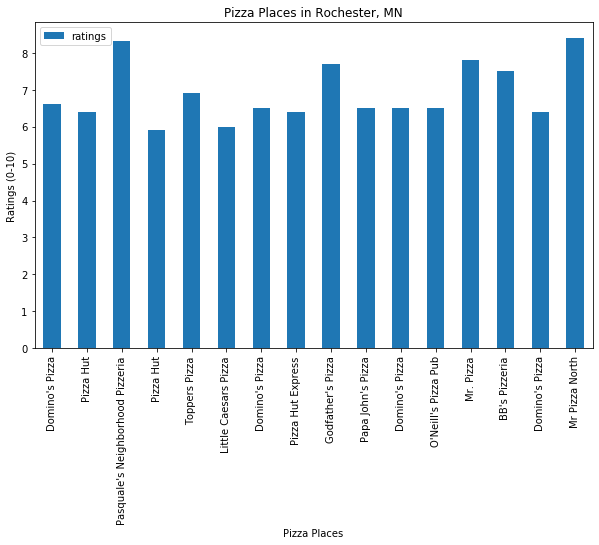

In [33]:
# Plot pizza place ratings
df_pizzarate.plot(kind='bar', figsize=(10, 6))

xlabels = df_pizzarate['name']
y_pos = np.arange(len(xlabels))

plt.xlabel('Pizza Places')
plt.ylabel('Ratings (0-10)')
plt.title('Pizza Places in Rochester, MN')

plt.xticks(y_pos, xlabels)

plt.show()

Let's check out the top 5 pizza places in Rochester, MN by rating.

In [39]:
df_pizzarate.sort_values(by='ratings', ascending=False).head()

,name,ratings
29,Mr Pizza North,8.4
3,Pasquale's Neighborhood Pizzeria,8.3
24,Mr. Pizza,7.8
19,Godfather's Pizza,7.7
27,BB's Pizzeria,7.5


Since Mr Pizza North and Pasquale's Neighborhood Pizzeria are so close in their ratings, I check to see if I pull 'likes' data for both restaurants and use it as a tiebreaker.

In [40]:
# Check number of likes for Pasquele's Neighborhood Pizzeria
venue_id = '5830ee376e6075508c542540'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
pasquales_likes = result['response']['venue']['likes']['count']
print(pasquales_likes)

18


In [41]:
# Check number of likes for Mr Pizza North
venue_id = '4e7383a5c65bf4cd6217768b'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
mrpizza_likes = result['response']['venue']['likes']['count']
print(mrpizza_likes)

40


## The Results

As we can see, Mr Pizza North is clearly the winner based on my analysis. Mr Pizza North has the best rating of Pizza restaurants in Rochester, MN at 8.4 which is just barely better than the second place Pasquale's Neighborhood Pizzeria at 8.3, and when comparing the number of likes of each restaurant as a tiebreaker Mr Pizza North is the clear winner at 40 likes as opposed to Pasquale's Neighborhood Pizzeria at 18 likes.

With more time and a better Foursquare developer account, I'd dig deeper and use other metrics to try and determine a 'best' pizza place in town. I'd probably see if I can include dislikes in my analysis as well and compare it to the number of likes per restaurant, and I could look into user tips as well to better understand what people are actually saying about the restuarants and their pizza.

I also understand that there are many flaws in this analysis, including not looking at the number of dislikes as I just mentioned and knowing that some of these restaurants don't just sell pizza, so the rating of the restaurant doesn't necessarily represent the rating of the pizza they sell. Nevertheless, this was a fun and interesting project that could apply to anyone wanting to try the 'best pizza in town' for their respective area!